## ECG Analysis


#### Possibly useful packages
- [ECG cleaning and more](https://neuropsychology.github.io/NeuroKit/functions/ecg.html)

### Analysis Steps
- Read `ptbxl_database.csv`
- Use `filename_hr` to get ECG record

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wfdb
%autosave 300

Autosaving every 300 seconds


We will use the `wfdb` package to read our files 

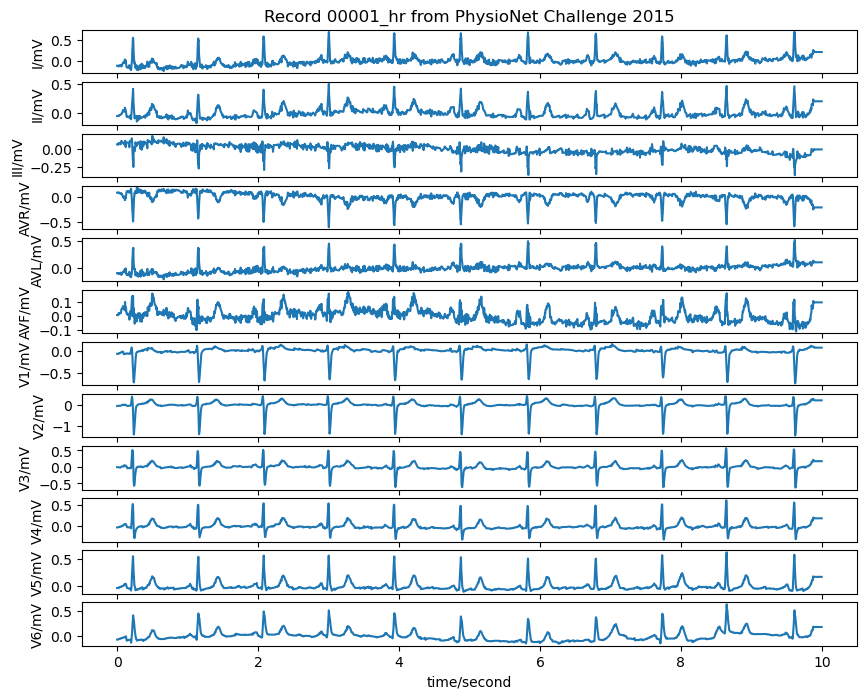

In [2]:
path = '../data/physionet.org/files/ptb-xl/1.0.3/records500/00000/'

record = wfdb.rdrecord(path+'00001_hr')
wfdb.plot_wfdb(record=record, title='Record 00001_hr from PhysioNet Challenge 2015', figsize=(10,8)) 
#display(record.__dict__)

Metadata: 
 {'fs': 500, 'sig_len': 5000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['I'], 'comments': []}


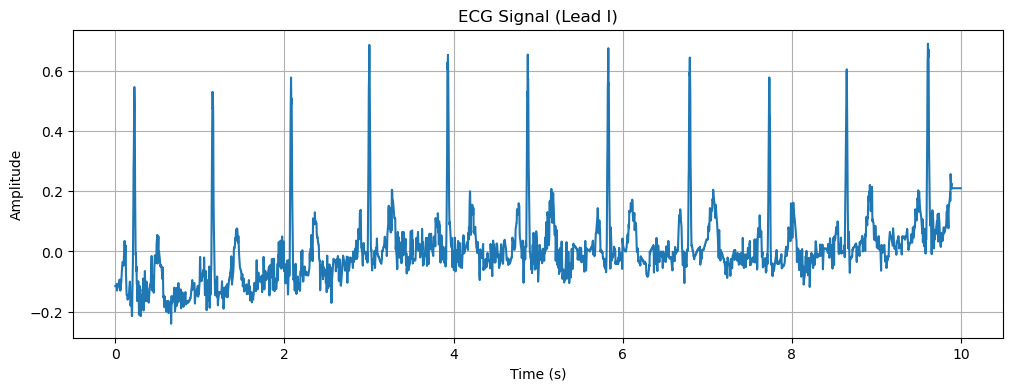

In [3]:
file = path+'00001_hr'


# Read signal and metadata
signals, fields = wfdb.rdsamp(file, channels=[0])  # Change channels=[0] based on your needs

sampling_frequency = fields['fs']  # Sampling frequency
sig_len = fields['sig_len'] # Signal length 
sig_name = fields['sig_name'] # Lead

# Print metadata
print("Metadata: \n", fields)

# Convert to time series
time = np.arange(0, sig_len) / sampling_frequency
#time = [i / sampling_frequency for i in range(sig_len)]

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, signals)
plt.title('ECG Signal (Lead {})'.format(sig_name[0]))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Metadata

### Patient Information

In [7]:
metadata = pd.read_csv('../data/physionet.org/files/ptb-xl/1.0.3/ptbxl_database.csv')
metadata = metadata.set_index('ecg_id')

In [9]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21799 entries, 1 to 21837
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21799 non-null  float64
 1   age                           21799 non-null  float64
 2   sex                           21799 non-null  int64  
 3   height                        6974 non-null   float64
 4   weight                        9421 non-null   float64
 5   nurse                         20326 non-null  float64
 6   site                          21782 non-null  float64
 7   device                        21799 non-null  object 
 8   recording_date                21799 non-null  object 
 9   report                        21799 non-null  object 
 10  scp_codes                     21799 non-null  object 
 11  heart_axis                    13331 non-null  object 
 12  infarction_stadium1           5612 non-null   object 
 13  infarc

In [14]:
metadata['scp_codes']

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21799, dtype: object

### Annotations

**Data Dictionanry**

- diagnosis : 
- description : 
- diagnoastic
- form :
- rhythm :
- diagnostic class :
- dignostic subclass : 
- Statement Category : 
- SCP-ECG Statement Description : 
- AHA code :
- aECG REFID :
- CDISC Code : 
- DICOM Code :

In [12]:
reports = pd.read_csv('../data/physionet.org/files/ptb-xl/1.0.3/scp_statements.csv')

In [13]:
reports

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
67,AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
68,SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290
69,PSVT,paroxysmal supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,paroxysmal supraventricular tachycardia,NaN,MDC_ECG_RHY_SV_TACHY_PAROX,NaN,NaN


In [12]:
reports.rename(columns={'Unnamed: 0': 'diagnosis'}, inplace=True)

| # Records | Superclass | Description            |
|-----------|------------|------------------------|
| 9514      | NORM       | Normal ECG             |
| 5469      | MI         | Myocardial Infarction  |
| 5235      | STTC       | ST/T Change            |
| 4898      | CD         | Conduction Disturbance |
| 2649      | HYP        | Hypertrophy            |